In [52]:
# * ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [53]:
# * データの読み込み
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [54]:
# * データの標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
# * PCAで2次元に変換
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [56]:
# * 2値分類(クラス0と1)
binary_mask = (y == 0) | (y == 1)
X_binary = X_pca[binary_mask]
y_binary = y[binary_mask]

In [57]:
# * ロジスティック回帰モデルの学習(2値分類)
model_binary = LogisticRegression()
model_binary.fit(X_binary, y_binary)

LogisticRegression()

In [58]:
# * 多クラス分類用データ
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [59]:
# * ロジスティック回帰モデルの学習(多クラス分類)
model_multiclass = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_multiclass.fit(X_train, y_train)

/home/nukko0529/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [60]:
# * 決定境界のプロット関数
def plot_decision_boundary(model, X, y, title, labels=None):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='Pastel1')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='Set1', alpha=0.8)
    plt.title(title)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    #if labels is not None:
     #   plt.legend(handles=scatter.legend_elements()[0], labels=labels)
    #plt.legend(handles=scatter.legend_elements()[0], labels=target_names)
    #if labels is None:
     #   unique_classes = np.unique(y)
     #   labels = [f"Class {int(cls)}" for cls in unique_classes]
    #legend_elements = scatter.legend_elements()[0]
    #handles, _ = scatter.legend_elements()
    plt.legend(handles=scatter.legend_elements()[0], labels=labels, title="Classes")
    plt.grid(True)

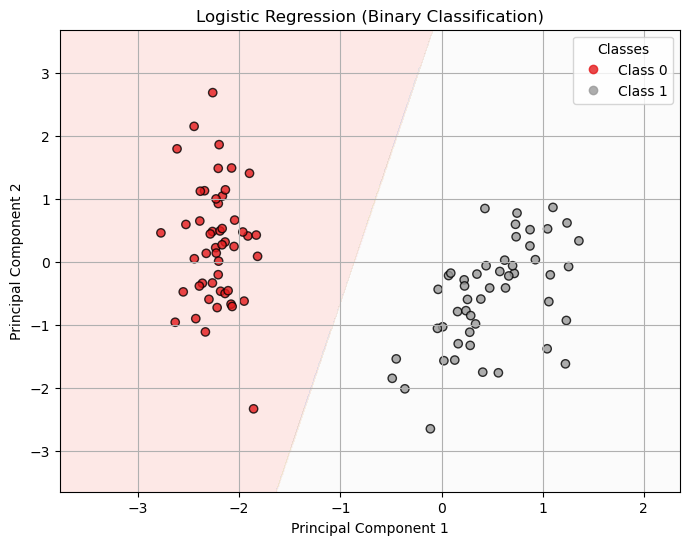

In [61]:
# * 2値分類の決定境界
binary_labels = ['Class 0', 'Class 1']
plt.figure(figsize=(8,6))
plot_decision_boundary(model_binary, X_binary, y_binary, "Logistic Regression (Binary Classification)", labels=binary_labels)
plt.show()

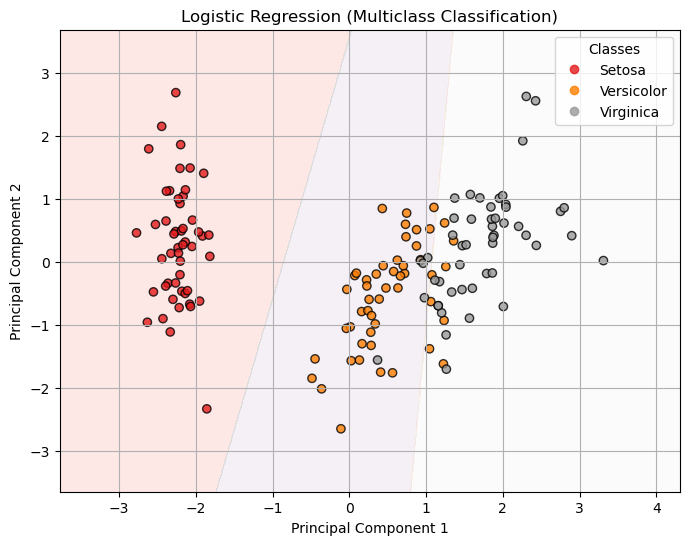

In [62]:
# * 多クラス分類の決定境界(全ラベルを渡す)
multi_labels = ['Setosa', 'Versicolor', 'Virginica']
plt.figure(figsize=(8,6))
plot_decision_boundary(model_multiclass, X_pca, y, "Logistic Regression (Multiclass Classification)", labels=multi_labels)
plt.show()